In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
from sklearn.cluster import MeanShift
import seaborn as sns
from matplotlib import pyplot as plt   

In [3]:
image_path = 'Heineken.jpg'
csv_file_path = 'Heineken.csv'
ms_bandwidth=60

In [4]:
def mean_shift_clustering(image_path, csv_file_path, ms_bandwidth=60):

    """
    :param image_path: path to image file
    :type image_path: str
    :param csv_file_path: path to csv file
    :type csv_file_path: str
    :param ms_bandwidth: mean shift bandwidth default = 60
    :type ms_bandwidth: int
    :return: None
    """

    # read the csv file
    heineken = pd.read_csv(csv_file_path, header=None, sep=";", names=["timestamp", "x", "y"])

    # convert pandas dataframe to numpy array
    X = heineken[['x', 'y']].to_numpy()

    # instantiate a mean shift cluster
    ms = MeanShift(bandwidth=ms_bandwidth, cluster_all=False, bin_seeding=False)

    # fit the data
    ms.fit(X)

    # store cluster centers
    cluster_centers = ms.cluster_centers_

    # read the image
    img = plt.imread(image_path)

    fig, ax = plt.subplots(1)

    fig.set_size_inches(img.shape[1] / 41.88, img.shape[1] / 41.88)

    # plot kernel density estimation
    ax = sns.kdeplot(heineken.x,
                     heineken.y,
                     cut=5,
                     bw_method=0.12,
                     cmap="Spectral_r",
                     cbar=True,
                     cbar_kws={
                         'orientation': 'vertical',
                         'use_gridspec': True,
                         'shrink': 0.5,
                         'anchor': (0.5, 0.5),
                         'label': "kde density",
                     },
                     n_levels=7,
                     shade=True,
                     thresh=0.4,
                     legend=True,
                     alpha=0.6,
                     )

    # plot cluster centers
    ax.scatter(cluster_centers[:, 0],
               cluster_centers[:, 1],
               marker='o',
               color='red',
               s=100,
               linewidth=1,
               zorder=10,
               alpha=0.5)

    plt.axis('off')

    ax.imshow(img)

    output_path = image_path[:-4] + '_heatMap_igi' + '.jpg'
    
    fig.savefig(output_path, transparent=True, bbox_inches='tight', pad_inches=0)

    return 

/home/igi/jupyter_notebooks/jupyter_venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


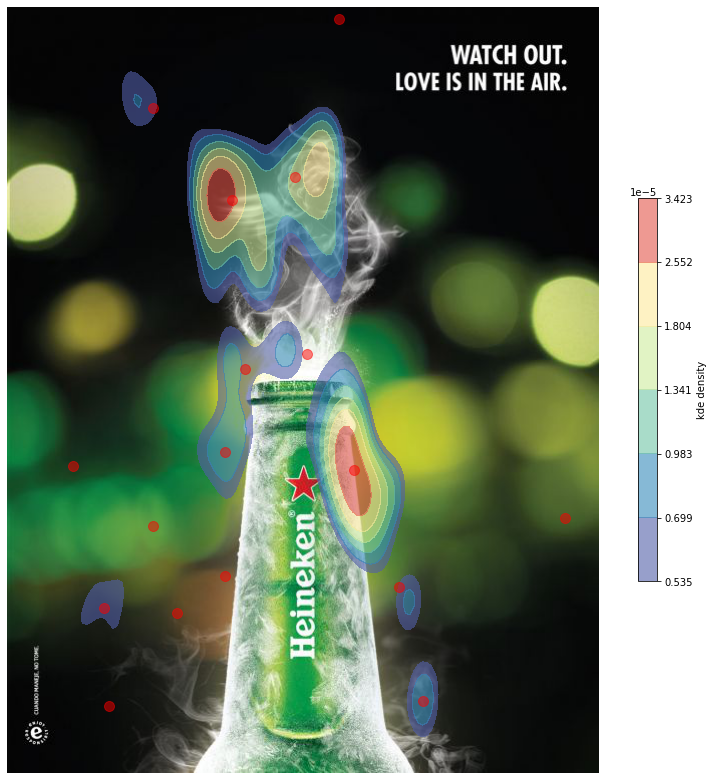

In [5]:
mean_shift_clustering(image_path, csv_file_path)